In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/book_genres.csv")


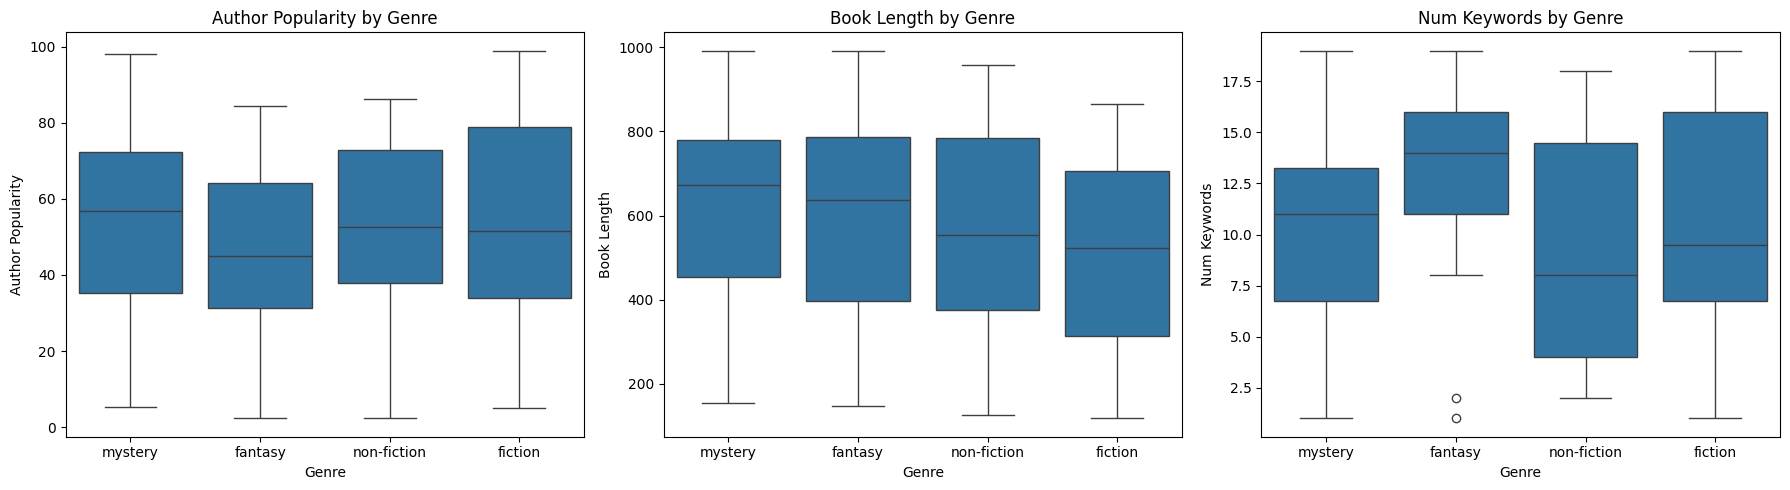

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(18, 5))

# Boxplots for each feature by genre
for i, col in enumerate(['author_popularity', 'book_length', 'num_keywords']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='genre', y=col)
    plt.title(f"{col.replace('_', ' ').title()} by Genre")
    plt.xlabel("Genre")
    plt.ylabel(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()


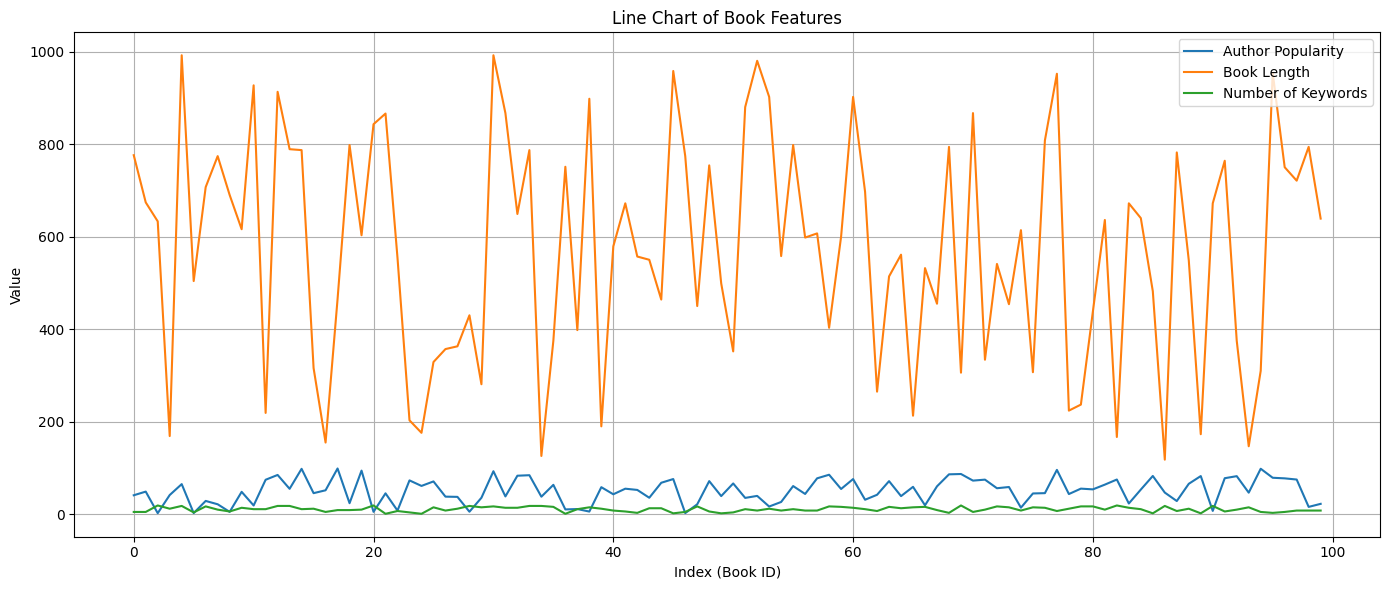

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(df.index, df['author_popularity'], label='Author Popularity')
plt.plot(df.index, df['book_length'], label='Book Length')
plt.plot(df.index, df['num_keywords'], label='Number of Keywords')

plt.title("Line Chart of Book Features")
plt.xlabel("Index (Book ID)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Group by genre and compute summary statistics
summary_df = df.groupby('genre').agg({
    'author_popularity': ['mean', 'min', 'max'],
    'book_length': ['mean', 'min', 'max'],
    'num_keywords': ['mean', 'min', 'max']
})

# Flatten MultiIndex columns
summary_df.columns = ['_'.join(col).strip() for col in summary_df.columns.values]
summary_df.reset_index(inplace=True)

# Display the data sheet
summary_df


,genre,author_popularity_mean,author_popularity_min,author_popularity_max,book_length_mean,book_length_min,book_length_max,num_keywords_mean,num_keywords_min,num_keywords_max
0,fantasy,45.123731,2.323401,84.390225,595.600000,147,992,13.120000,1,19
1,fiction,56.000348,5.156557,98.932558,503.650000,118,866,10.500000,1,19
2,mystery,53.484360,5.240918,98.189027,609.718750,155,992,10.468750,1,19
3,non-fiction,48.967062,2.448198,86.289857,554.913043,126,958,8.956522,2,18


In [12]:
# Get full descriptive statistics for all numerical columns
desc_stats_df = df.describe().transpose().reset_index().rename(columns={"index": "feature"})
desc_stats_df


,feature,count,mean,std,min,25%,50%,75%,max
0,author_popularity,100.0,50.858422,26.508491,2.323401,34.357864,52.204849,73.536948,98.932558
1,book_length,100.0,572.370000,244.874763,118.000000,372.000000,599.000000,777.500000,992.000000
2,num_keywords,100.0,10.790000,5.189918,1.000000,7.000000,11.000000,15.000000,19.000000


In [13]:
genre_count_df = df['genre'].value_counts().reset_index()
genre_count_df.columns = ['genre', 'count']
genre_count_df


,genre,count
0,mystery,32
1,fantasy,25
2,non-fiction,23
3,fiction,20


In [14]:
# Group by genre and get median values
genre_median_df = df.groupby('genre')[['author_popularity', 'book_length', 'num_keywords']].median().reset_index()
genre_median_df



,genre,author_popularity,book_length,num_keywords
0,fantasy,44.942060,636.0,14.0
1,fiction,51.541587,523.0,9.5
2,mystery,56.887849,672.0,11.0
3,non-fiction,52.586246,554.0,8.0


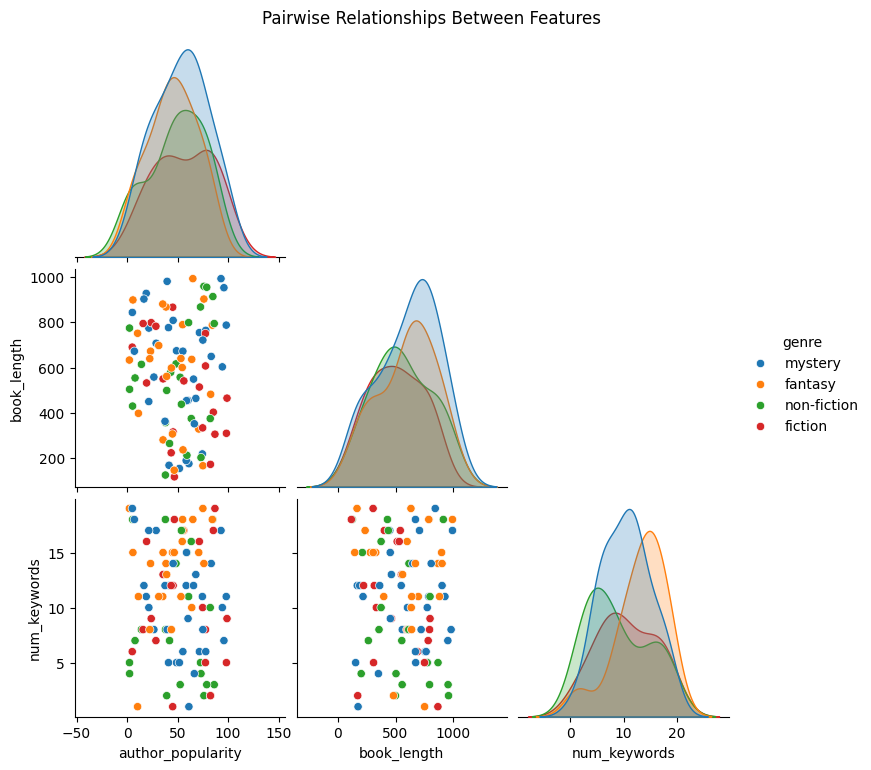

In [8]:
sns.pairplot(df, hue="genre", diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()


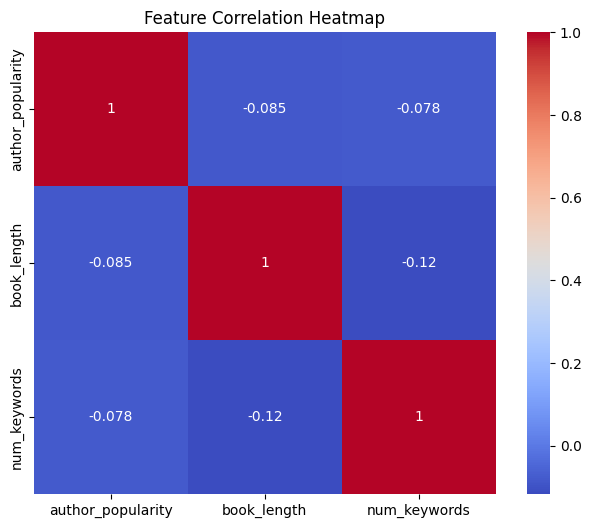

In [9]:
# Compute correlation matrix
corr = df.drop(columns='genre').corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()
